# OASIS TASK - 3
# CAR PRICE PREDICTION WITH MACHINE LEARNING
### The price of a car depends on a lot of factors like the goodwill of the brand of the car,
### features of the car, horsepower and the mileage it gives and many more. Car price
### prediction is one of the major research areas in machine learning. So if you want to learn
### how to train a car price prediction model then this project is for you.



## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## IMPORTING THE DATASET

In [2]:
url="https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
data=pd.read_csv(url)

## INFORMATION ABOUT CAR DATASET

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [8]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## NUMERICAL FEATURES

In [16]:
numerical_data=[feature for feature in data.columns if data[feature].dtype!='O']

In [17]:
len(numerical_data)

16

In [18]:
print(numerical_data)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [20]:
descrete_data=[feature for feature in numerical_data if len(data[feature].unique())<=25]

In [21]:
descrete_data

['symboling', 'peakrpm']

In [23]:
car_data=data.copy()

In [24]:
car_data.drop("car_ID",axis=1,inplace=True)

In [25]:
len(descrete_data)

2

In [27]:
len(car_data['symboling'].unique())

6

In [28]:
len(car_data['peakrpm'].unique())

23

In [29]:
continous_data=[feature for feature in numerical_data if feature not in descrete_data]

In [30]:
len(continous_data)

14

In [33]:
continous_data

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

## DISTRIBUTION OF CONTINOUS FEATURES IN CAR DATASET

In [34]:
import matplotlib.pyplot as plt 

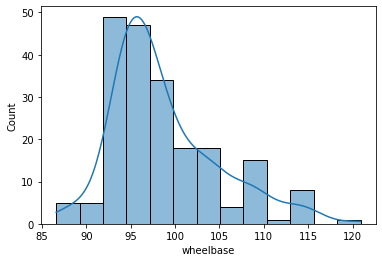

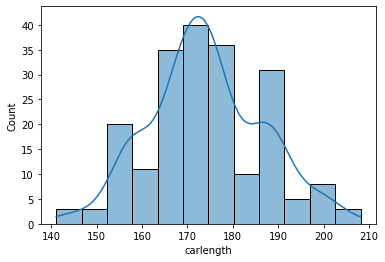

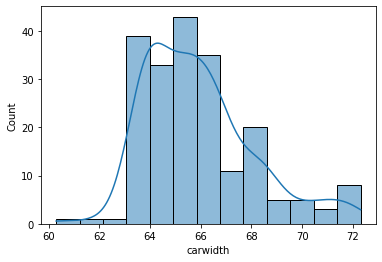

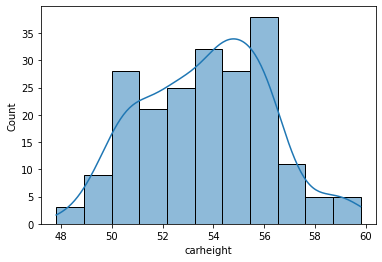

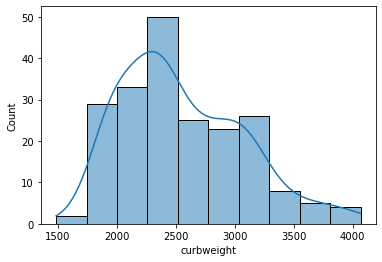

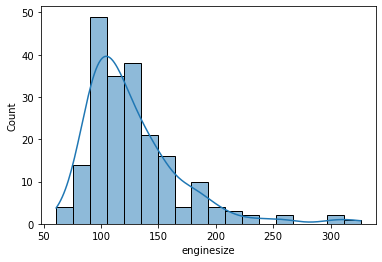

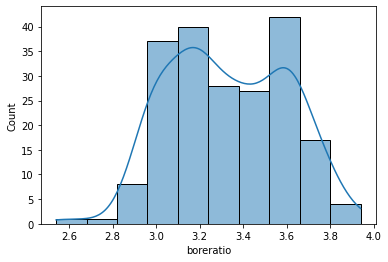

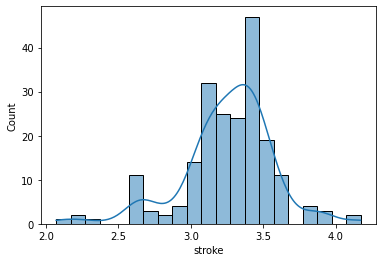

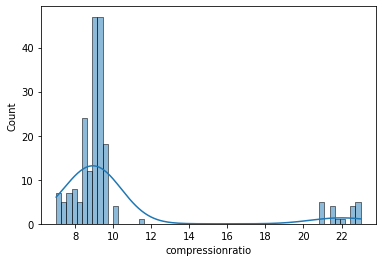

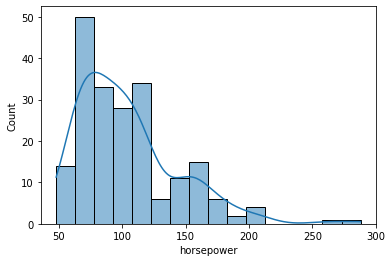

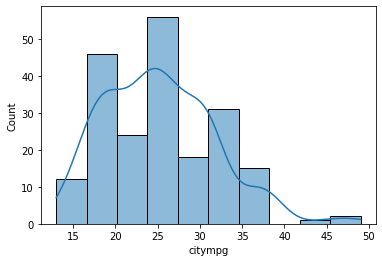

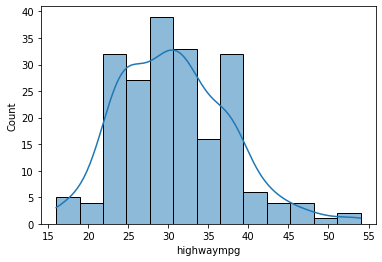

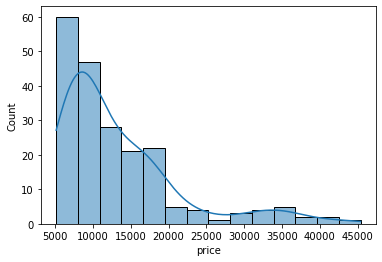

In [39]:
for col in continous_data:
    sns.histplot(data[col],kde=True)
    plt.show()

## CATEGORICAL FEATURES

In [40]:
catagorical_data=[feature for feature in data.columns if data[feature].dtype=='O']

In [41]:
len(catagorical_data)

10

In [42]:
catagorical_data

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [43]:
for col in catagorical_data:
    print(f"{col} : {len(data[col].unique())}")

CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


In [44]:
car_data.drop("CarName",axis=1,inplace=True)

## CONVERTING THE CATEGORICAL FEATURES INTO NUMERICAL FEATURES

In [47]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
car_data['fueltype']=le.fit_transform(car_data['fueltype'])

In [51]:
car_data['enginelocation']=le.fit_transform(car_data['enginelocation'])

In [55]:
carbody=pd.get_dummies(car_data['carbody'])

In [60]:
car_data=pd.concat([car_data,carbody],axis=1)

In [62]:
car_data.drop('carbody',axis=1,inplace=True)

In [64]:
enginetype=pd.get_dummies(car_data['enginetype'])

In [66]:
car_data=pd.concat([car_data,enginetype],axis=1)

In [67]:
car_data.drop('enginetype',axis=1,inplace=True)

In [69]:
cylindernumber=pd.get_dummies(car_data['cylindernumber'])
car_data=pd.concat([car_data,cylindernumber],axis=1)
car_data.drop('cylindernumber',axis=1,inplace=True)

In [71]:
fuelsystem=pd.get_dummies(car_data['fuelsystem'])
car_data=pd.concat([car_data,fuelsystem],axis=1)
car_data.drop('fuelsystem',axis=1,inplace=True)

In [81]:
car_data.drop('price',axis=1,inplace=True)

In [82]:
x=car_data.iloc[:,:].values
y=data.iloc[:,-1].values

## SPLITTING THE DATASET INTO TRAINING AND TESTING PURPOSE

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## FITTING DECISIONTREEREGRESSOR MODEL 

In [84]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

## PREDICTING THE RESULT

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import mean_absolute_error
print(f"the mean absolute error is : {mean_absolute_error(y_test,y_pred)}")

the mean absolute error is : 1937.5812926829267


## FINDING THE ACCURACY OF THE MODEL

In [87]:
from sklearn.metrics import r2_score
print(f"the mean absolute error is : {r2_score(y_test,y_pred)}")

the mean absolute error is : 0.8906301913798363
